# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [7]:
#Identificando todas as colunas do Dataframe
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [8]:
#Observando os dados da coluna que serão usados nesse exercício.
sinasc_raw['munResNome'].info() 
print()
sinasc_raw['munResNome'].nunique()

<class 'pandas.core.series.Series'>
RangeIndex: 27028 entries, 0 to 27027
Series name: munResNome
Non-Null Count  Dtype 
--------------  ----- 
27028 non-null  object
dtypes: object(1)
memory usage: 211.3+ KB



53

In [9]:
#Formando um novo dataframe só com as colunas necessárias para o exercício
sinasc_1 = sinasc_raw[['munResNome','IDADEPAI', 'IDADEMAE']]
sinasc_1.head()

,munResNome,IDADEPAI,IDADEMAE
0,Alta Floresta D'Oeste,26.0,19
1,Alta Floresta D'Oeste,24.0,29
2,Alta Floresta D'Oeste,32.0,37
3,Alto Alegre dos Parecis,24.0,30
4,Alta Floresta D'Oeste,27.0,30


In [10]:
#Verificando o número de linhas e colunas do dataframe.
sinasc_1.shape

(27028, 3)

In [12]:
# Verificando a existência de dados faltantes na coluna 'IDADEPAI'. 
sinasc_1.IDADEPAI.isna().sum()

19421

In [13]:
# Verificando a existência de dados faltantes na coluna 'munResNome'.
sinasc_1.munResNome.isna().sum()

0

In [14]:
#Retirando os dados ausentes 
sinasc_1= sinasc_1.dropna()

In [15]:
#Reavaliando o número de linhas e colunas.
sinasc_1.shape

(7607, 3)

In [16]:
#Verificando a média das idades das mães e dos pais por município.
result = sinasc_1.groupby('munResNome').mean()
result

,IDADEPAI,IDADEMAE
munResNome,,
Alta Floresta D'Oeste,29.548701,25.892857
Alto Alegre dos Parecis,29.179104,24.679104
Alto Paraíso,28.833333,22.833333
Alvorada D'Oeste,30.757282,26.825243
Ariquemes,32.466667,28.133333
Buritis,30.812500,24.750000
Cabixi,34.333333,32.166667
Cacaulândia,36.333333,31.000000
Cacoal,30.931854,26.978605


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [17]:
#Criando um dataframe para esse exercício. 
sinasc_2 = sinasc_raw[[
    'ESCMAE', 'DTNASC','SEXO','PESO'
]].copy()
sinasc_2.head()

,ESCMAE,DTNASC,SEXO,PESO
0,8 a 11 anos,2019-02-19,Masculino,3685
1,8 a 11 anos,2019-02-21,Feminino,3055
2,8 a 11 anos,2019-02-25,Feminino,3460
3,12 anos ou mais,2019-03-20,Feminino,2982
4,8 a 11 anos,2019-03-23,Feminino,3310


In [18]:
#Encontrando a data do meu aniversário no dataframe sinasc_2.

#Convertendo a coluna para o tipo datetime:

sinasc_2['DTNASC']= pd.to_datetime(sinasc_2['DTNASC']) 

In [19]:
#Usando a função loc para encontrar a data especifica.

data_meu_aniv = pd.to_datetime('2019-04-07')
resultado = sinasc_2.loc[sinasc_2['DTNASC']== data_meu_aniv]
resultado

,ESCMAE,DTNASC,SEXO,PESO
817,4 a 7 anos,2019-04-07,Masculino,3080
818,4 a 7 anos,2019-04-07,Masculino,3050
828,12 anos ou mais,2019-04-07,Masculino,2840
829,8 a 11 anos,2019-04-07,Feminino,3360
830,8 a 11 anos,2019-04-07,Feminino,3315
1877,8 a 11 anos,2019-04-07,Feminino,3335
1878,8 a 11 anos,2019-04-07,Feminino,3090
1879,8 a 11 anos,2019-04-07,Masculino,3920
1887,12 anos ou mais,2019-04-07,Feminino,3780
2487,8 a 11 anos,2019-04-07,Masculino,3375


In [20]:
#Encontrando o peso médio dos bebes por sexo pela escolaridade da mãe.
peso_medio = resultado.groupby (['ESCMAE','SEXO'])['PESO'].mean()
peso_medio

ESCMAE           SEXO     
1 a 3 anos       Feminino     2685.000000
12 anos ou mais  Feminino     3296.875000
                 Masculino    3040.000000
4 a 7 anos       Feminino     3235.000000
                 Masculino    3177.500000
8 a 11 anos      Feminino     3230.960000
                 Masculino    3280.666667
Name: PESO, dtype: float64

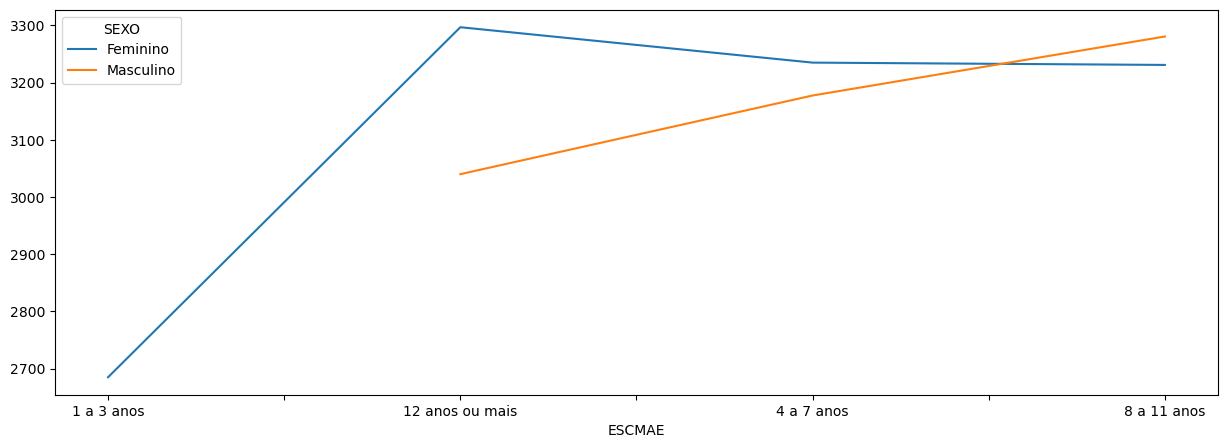

In [21]:
#Exibindo o resultado anterior em gráfico. 

peso_medio.unstack().plot(figsize=[15,5]);

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [22]:
#Dataframe usado para esse exercício.
sinasc_1.head()

,munResNome,IDADEPAI,IDADEMAE
0,Alta Floresta D'Oeste,26.0,19
1,Alta Floresta D'Oeste,24.0,29
2,Alta Floresta D'Oeste,32.0,37
3,Alto Alegre dos Parecis,24.0,30
4,Alta Floresta D'Oeste,27.0,30


In [23]:
sinasc_raw.DTNASC.value_counts()

2019-04-10    116
2019-03-21    109
2019-09-25    108
2019-09-02    105
2019-12-04    104
             ... 
2019-12-25     44
2019-02-09     44
2019-07-28     44
2019-08-04     43
2019-11-03     40
Name: DTNASC, Length: 365, dtype: int64

In [24]:
#Municípios em ordem crescente de número de nascimentos de bebes com a média, maxima e a mínima das idades dos pais e mães
munimen = sinasc_1.groupby('munResNome')
x = munimen.agg({'munResNome':['count'],
             'IDADEMAE':['min','mean','max'],
             'IDADEPAI':['min','mean','max']})


x.sort_values(('munResNome','count'))

munResNome IDADEMAE                IDADEPAI  \
                               count      min       mean max      min   
munResNome                                                              
Rio Crespo                         1       26  26.000000  26     28.0   
Município ignorado - RO            1       24  24.000000  24     22.0   
Pimenteiras do Oeste               5       27  32.600000  40     25.0   
Alto Paraíso                       6       16  22.833333  32     21.0   
Cabixi                             6       18  32.166667  38     19.0   
Cacaulândia                        6       18  31.000000  42     28.0   
Itapuã do Oeste                    8       27  31.375000  39     25.0   
Governador Jorge Teixeira          9       17  25.555556  34     22.0   
Cujubim                           10       17  27.400000  37     19.0   
Theobroma                         12       19  24.916667  38     23.0   
Ariquemes                         15       15  28.133333  39     20.0   
Vale do Anari                     15       17  27.133333  39     23.0   
Corumbiara                        17       17  29.000000  43     21.0   
Guajará-Mirim                     17       19  26.058824  39     19.0   
Candeias do Jamari                19       15  23.684211  34     21.0   
Chupinguaia                       27       17  26.888889  38     20.0   
Castanheiras                      28       18  28.071429  39     17.0   
Monte Negro                       28       15  27.642857  40     20.0   
Campo Novo de Rondônia            30       17  24.900000  40     21.0   
Colorado do Oeste                 31       23  31.161290  41     23.0   
Seringueiras                      34       15  25.058824  39     20.0   
São Francisco do Guaporé          36       15  26.944444  40     19.0   
Primavera de Rondônia             36       17  28.083333  39     21.0   
Parecis                           38       17  26.973684  41     18.0   
Nova Mamoré                       39       15  26.051282  46     19.0   
Vale do Paraíso                   43       14  25.604651  40     18.0   
Teixeirópolis                     44       16  27.454545  39     20.0   
Costa Marques                     44       17  25.250000  41     17.0   
São Felipe D'Oeste                48       17  26.979167  41     18.0   
Nova Brasilândia D'Oeste          48       15  27.104167  38     20.0   
Buritis                           64       16  24.750000  42     18.0   
Nova União                        70       16  27.371429  39     18.0   
Cerejeiras                        72       15  28.361111  42     19.0   
Ministro Andreazza                73       17  27.890411  44     21.0   
São Miguel do Guaporé             81       17  27.469136  42     19.0   
Mirante da Serra                  84       16  26.928571  41     20.0   
Novo Horizonte do Oeste           85       16  26.988235  41     20.0   
Santa Luzia D'Oeste               91       15  26.043956  41     18.0   
Alvorada D'Oeste                 103       15  26.825243  40     17.0   
Machadinho D'Oeste               104       13  26.048077  40     17.0   
Urupá                            112       15  27.116071  43     17.0   
Alto Alegre dos Parecis          134       14  24.679104  41     16.0   
Jaru                             142       15  28.450704  44     19.0   
Vilhena                          170       16  30.611765  44     18.0   
Presidente Médici                199       15  26.170854  43     16.0   
Alta Floresta D'Oeste            308       14  25.892857  53     17.0   
Espigão D'Oeste                  318       14  26.808176  44     16.0   
Ouro Preto do Oeste              373       14  27.109920  44     17.0   
Pimenta Bueno                    518       13  25.449807  47     16.0   
Porto Velho                      672       12  28.355655  44     16.0   
Rolim de Moura                   835       14  26.549701  44     16.0   
Ji-Paraná                       1036       13  27.282819  44     15.0   
Cacoal     

In [25]:
#Caso seja considerado que o município ignorado é a resposta correta e não uma falha na coleta dos dados esse é o resultado.
min_count_index = x[('munResNome','count')].idxmin()
municipio_menos_nascimentos = x.loc[min_count_index]
municipio_menos_nascimentos

munResNome  count     1.0
IDADEMAE    min      24.0
            mean     24.0
            max      24.0
IDADEPAI    min      22.0
            mean     22.0
            max      22.0
Name: Município ignorado - RO, dtype: float64

In [26]:
mun_em_ord= x.sort_values(('munResNome','count'))
mun_em_ord

munResNome IDADEMAE                IDADEPAI  \
                               count      min       mean max      min   
munResNome                                                              
Rio Crespo                         1       26  26.000000  26     28.0   
Município ignorado - RO            1       24  24.000000  24     22.0   
Pimenteiras do Oeste               5       27  32.600000  40     25.0   
Alto Paraíso                       6       16  22.833333  32     21.0   
Cabixi                             6       18  32.166667  38     19.0   
Cacaulândia                        6       18  31.000000  42     28.0   
Itapuã do Oeste                    8       27  31.375000  39     25.0   
Governador Jorge Teixeira          9       17  25.555556  34     22.0   
Cujubim                           10       17  27.400000  37     19.0   
Theobroma                         12       19  24.916667  38     23.0   
Ariquemes                         15       15  28.133333  39     20.0   
Vale do Anari                     15       17  27.133333  39     23.0   
Corumbiara                        17       17  29.000000  43     21.0   
Guajará-Mirim                     17       19  26.058824  39     19.0   
Candeias do Jamari                19       15  23.684211  34     21.0   
Chupinguaia                       27       17  26.888889  38     20.0   
Castanheiras                      28       18  28.071429  39     17.0   
Monte Negro                       28       15  27.642857  40     20.0   
Campo Novo de Rondônia            30       17  24.900000  40     21.0   
Colorado do Oeste                 31       23  31.161290  41     23.0   
Seringueiras                      34       15  25.058824  39     20.0   
São Francisco do Guaporé          36       15  26.944444  40     19.0   
Primavera de Rondônia             36       17  28.083333  39     21.0   
Parecis                           38       17  26.973684  41     18.0   
Nova Mamoré                       39       15  26.051282  46     19.0   
Vale do Paraíso                   43       14  25.604651  40     18.0   
Teixeirópolis                     44       16  27.454545  39     20.0   
Costa Marques                     44       17  25.250000  41     17.0   
São Felipe D'Oeste                48       17  26.979167  41     18.0   
Nova Brasilândia D'Oeste          48       15  27.104167  38     20.0   
Buritis                           64       16  24.750000  42     18.0   
Nova União                        70       16  27.371429  39     18.0   
Cerejeiras                        72       15  28.361111  42     19.0   
Ministro Andreazza                73       17  27.890411  44     21.0   
São Miguel do Guaporé             81       17  27.469136  42     19.0   
Mirante da Serra                  84       16  26.928571  41     20.0   
Novo Horizonte do Oeste           85       16  26.988235  41     20.0   
Santa Luzia D'Oeste               91       15  26.043956  41     18.0   
Alvorada D'Oeste                 103       15  26.825243  40     17.0   
Machadinho D'Oeste               104       13  26.048077  40     17.0   
Urupá                            112       15  27.116071  43     17.0   
Alto Alegre dos Parecis          134       14  24.679104  41     16.0   
Jaru                             142       15  28.450704  44     19.0   
Vilhena                          170       16  30.611765  44     18.0   
Presidente Médici                199       15  26.170854  43     16.0   
Alta Floresta D'Oeste            308       14  25.892857  53     17.0   
Espigão D'Oeste                  318       14  26.808176  44     16.0   
Ouro Preto do Oeste              373       14  27.109920  44     17.0   
Pimenta Bueno                    518       13  25.449807  47     16.0   
Porto Velho                      672       12  28.355655  44     16.0   
Rolim de Moura                   835       14  26.549701  44     16.0   
Ji-Paraná                       1036       13  27.282819  44     15.0   
Cacoal     

In [29]:
mun_em_ord_sem_ignorado= mun_em_ord.drop(mun_em_ord.index[0])
#mun_em_ord_sem_ignorado

In [44]:
min_count_index = x[('munResNome','count')].idxmin()
municipio_menos_nascimentos = x.loc[min_count_index]
municipio_menos_nascimentos

munResNome  count     1.0
IDADEMAE    min      24.0
            mean     24.0
            max      24.0
IDADEPAI    min      22.0
            mean     22.0
            max      22.0
Name: Município ignorado - RO, dtype: float64

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

In [49]:
#Formando um novo dataframe com as colunas necessárias para o exercício
sinasc_3 = sinasc_raw[['munResNome','IDADEPAI', 'IDADEMAE','QTDFILVIVO','DTNASC']]
sinasc_3.head()

,munResNome,IDADEPAI,IDADEMAE,QTDFILVIVO,DTNASC
0,Alta Floresta D'Oeste,26.0,19,0.0,2019-02-19
1,Alta Floresta D'Oeste,24.0,29,1.0,2019-02-21
2,Alta Floresta D'Oeste,32.0,37,2.0,2019-02-25
3,Alto Alegre dos Parecis,24.0,30,0.0,2019-03-20
4,Alta Floresta D'Oeste,27.0,30,1.0,2019-03-23


In [35]:
#Quantidade de filhos vivios(Média, maxima,minima)

munimen = sinasc_raw[['munResNome','IDADEMAE','IDADEPAI','QTDFILVIVO']].groupby('munResNome')
x = munimen.agg({'munResNome':['count'],
             'QTDFILVIVO':['min','mean','max']})


x.sort_values(('munResNome','count'))

munResNome QTDFILVIVO                
                               count        min      mean   max
munResNome                                                     
Município ignorado - RO            1        1.0  1.000000   1.0
Castanheiras                      32        0.0  1.062500   6.0
Pimenteiras do Oeste              40        0.0  1.150000   5.0
Primavera de Rondônia             43        0.0  1.093023   4.0
Parecis                           44        0.0  1.302326   5.0
Rio Crespo                        50        0.0  1.255319   4.0
São Felipe D'Oeste                54        0.0  0.773585   5.0
Teixeirópolis                     64        0.0  0.859375   6.0
Cacaulândia                       75        0.0  1.013333   7.0
Cabixi                            80        0.0  0.762500   4.0
Vale do Paraíso                   81        0.0  0.696203   4.0
Ministro Andreazza                84        0.0  1.095238   6.0
Vale do Anari                     93        0.0  1.173913   8.0
Theobroma                         97        0.0  0.905263   4.0
Novo Horizonte do Oeste           98        0.0  0.835052   4.0
Santa Luzia D'Oeste               99        0.0  1.171717  30.0
Nova União                       104        0.0  0.844660   4.0
Itapuã do Oeste                  109        0.0  1.410000   6.0
Governador Jorge Teixeira        112        0.0  0.768519   5.0
Corumbiara                       127        0.0  0.849206   4.0
Alto Alegre dos Parecis          154        0.0  0.907895   5.0
Chupinguaia                      162        0.0  1.081250   8.0
Mirante da Serra                 164        0.0  0.932515   5.0
Campo Novo de Rondônia           166        0.0  1.160305   5.0
Seringueiras                     168        0.0  0.880240   5.0
Urupá                            170        0.0  0.946746   5.0
Monte Negro                      199        0.0  0.989583   7.0
Cujubim                          205        0.0  1.256158   7.0
Alvorada D'Oeste                 205        0.0  0.975248   9.0
Colorado do Oeste                214        0.0  0.934579   8.0
Alto Paraíso                     226        0.0  1.162896   6.0
Costa Marques                    233        0.0  1.258772  14.0
Cerejeiras                       237        0.0  0.987124   8.0
Nova Brasilândia D'Oeste         261        0.0  0.879845   4.0
São Francisco do Guaporé         303        0.0  1.079734   6.0
Presidente Médici                304        0.0  0.930233   7.0
Candeias do Jamari               337        0.0  1.433775   8.0
São Miguel do Guaporé            353        0.0  0.891117   6.0
Alta Floresta D'Oeste            367        0.0  0.856354   7.0
Nova Mamoré                      432        0.0  1.295455   8.0
Espigão D'Oeste                  450        0.0  1.405830  12.0
Machadinho D'Oeste               500        0.0  1.114286  10.0
Buritis                          583        0.0  1.353846  10.0
Pimenta Bueno                    616        0.0  0.863934   9.0
Ouro Preto do Oeste              631        0.0  0.899361   6.0
Guajará-Mirim                    781        0.0  1.543563  11.0
Jaru                             881        0.0  0.891304   7.0
Rolim de Moura                   927        0.0  0.858542   5.0
Cacoal                          1374        0.0  0.899123   7.0
Vilhena                         1590        0.0  0.917929  10.0
Ariquemes                       1729        0.0  0.962253   8.0
Ji-Paraná                       2182        0.0  0.933272   8.0
Porto Velho                     8437        0.0  1.167236  12.0

In [19]:
munimen = sinasc_raw[['munResNome','IDADEMAE','IDADEPAI',]].groupby('munResNome')
x = munimen.agg({'munResNome':['count'],
             'IDADEMAE':['min','mean','max'],
             'IDADEPAI':['min','mean','max']})


x.sort_values(('munResNome','count'))

munResNome IDADEMAE                IDADEPAI  \
                               count      min       mean max      min   
munResNome                                                              
Município ignorado - RO            1       24  24.000000  24     22.0   
Castanheiras                      32       17  27.281250  39     17.0   
Pimenteiras do Oeste              40       14  25.075000  40     25.0   
Primavera de Rondônia             43       16  27.023256  39     21.0   
Parecis                           44       16  26.454545  41     18.0   
Rio Crespo                        50       16  26.660000  39     28.0   
São Felipe D'Oeste                54       17  26.481481  41     18.0   
Teixeirópolis                     64       16  26.031250  39     20.0   
Cacaulândia                       75       16  25.546667  42     28.0   
Cabixi                            80       13  26.037500  39     19.0   
Vale do Paraíso                   81       14  25.679012  52     18.0   
Ministro Andreazza                84       17  27.904762  44     21.0   
Vale do Anari                     93       14  26.096774  44     23.0   
Theobroma                         97       15  25.536082  42     23.0   
Novo Horizonte do Oeste           98       15  26.938776  41     20.0   
Santa Luzia D'Oeste               99       15  26.121212  41     18.0   
Nova União                       104       16  26.894231  39     18.0   
Itapuã do Oeste                  109       15  26.064220  46     25.0   
Governador Jorge Teixeira        112       13  24.401786  41     22.0   
Corumbiara                       127       15  24.716535  43     21.0   
Alto Alegre dos Parecis          154       14  24.844156  41     16.0   
Chupinguaia                      162       13  25.333333  42     20.0   
Mirante da Serra                 164       14  26.304878  46     20.0   
Campo Novo de Rondônia           166       13  24.825301  40     21.0   
Seringueiras                     168       14  24.910714  42     20.0   
Urupá                            170       15  26.688235  43     17.0   
Monte Negro                      199       14  25.648241  40     20.0   
Cujubim                          205       14  24.482927  42     19.0   
Alvorada D'Oeste                 205       15  25.770732  44     17.0   
Colorado do Oeste                214       15  27.602804  47     23.0   
Alto Paraíso                     226       11  24.960177  42     21.0   
Costa Marques                    233       12  24.412017  41     17.0   
Cerejeiras                       237       15  27.240506  53     19.0   
Nova Brasilândia D'Oeste         261       15  26.222222  51     20.0   
São Francisco do Guaporé         303       14  25.660066  41     19.0   
Presidente Médici                304       14  25.796053  44     16.0   
Candeias do Jamari               337       14  25.243323  45     21.0   
São Miguel do Guaporé            353       14  25.926346  42     19.0   
Alta Floresta D'Oeste            367       14  25.991826  53     17.0   
Nova Mamoré                      432       14  25.326389  46     19.0   
Espigão D'Oeste                  450       14  26.093333  44     16.0   
Machadinho D'Oeste               500       13  25.480000  44     17.0   
Buritis                          583       14  25.559177  44     18.0   
Pimenta Bueno                    616       13  25.199675  47     16.0   
Ouro Preto do Oeste              631       14  26.375594  44     17.0   
Guajará-Mirim                    781       13  25.462228  43     19.0   
Jaru                             881       12  25.982974  45     19.0   
Rolim de Moura                   927       14  26.600863  44     16.0   
Cacoal                          1374       14  26.890102  47     17.0   
Vilhena                         1590       14  26.433962  46     18.0   
Ariquemes                       1729       13  25.607866  44     20.0   
Ji-Paraná                       2182       12  26.361137  44     15.0   
Porto Velho

In [48]:
max_count_index = x[('munResNome','count')].idxmax()
municipio_mais_nascimentos = x.loc[max_count_index]
municipio_mais_nascimentos

munResNome  count    8437.000000
IDADEMAE    min        12.000000
            mean       26.312670
            max        47.000000
IDADEPAI    min        16.000000
            mean       32.352679
            max        65.000000
Name: Porto Velho, dtype: float64

In [41]:
#Idade média dos pais.
munimen = sinasc_raw[['munResNome','IDADEMAE','IDADEPAI','QTDFILVIVO']].groupby('munResNome')
x = munimen.agg({'munResNome':['count'],
             'IDADEPAI':['min','mean','max']})


x.sort_values(('munResNome','count'))

munResNome IDADEPAI                 
                               count      min       mean   max
munResNome                                                    
Município ignorado - RO            1     22.0  22.000000  22.0
Castanheiras                      32     17.0  30.392857  43.0
Pimenteiras do Oeste              40     25.0  35.600000  45.0
Primavera de Rondônia             43     21.0  31.888889  44.0
Parecis                           44     18.0  32.473684  61.0
Rio Crespo                        50     28.0  28.000000  28.0
São Felipe D'Oeste                54     18.0  31.395833  57.0
Teixeirópolis                     64     20.0  31.500000  67.0
Cacaulândia                       75     28.0  36.333333  50.0
Cabixi                            80     19.0  34.333333  47.0
Vale do Paraíso                   81     18.0  29.976744  51.0
Ministro Andreazza                84     21.0  33.849315  55.0
Vale do Anari                     93     23.0  34.000000  58.0
Theobroma                         97     23.0  30.083333  45.0
Novo Horizonte do Oeste           98     20.0  31.588235  56.0
Santa Luzia D'Oeste               99     18.0  30.703297  53.0
Nova União                       104     18.0  31.371429  53.0
Itapuã do Oeste                  109     25.0  42.500000  73.0
Governador Jorge Teixeira        112     22.0  29.222222  37.0
Corumbiara                       127     21.0  32.470588  52.0
Alto Alegre dos Parecis          154     16.0  29.179104  50.0
Chupinguaia                      162     20.0  29.629630  46.0
Mirante da Serra                 164     20.0  32.154762  56.0
Campo Novo de Rondônia           166     21.0  30.500000  40.0
Seringueiras                     168     20.0  30.500000  47.0
Urupá                            170     17.0  31.008929  48.0
Monte Negro                      199     20.0  34.678571  55.0
Cujubim                          205     19.0  31.400000  44.0
Alvorada D'Oeste                 205     17.0  30.757282  52.0
Colorado do Oeste                214     23.0  34.354839  53.0
Alto Paraíso                     226     21.0  28.833333  49.0
Costa Marques                    233     17.0  30.613636  60.0
Cerejeiras                       237     19.0  31.652778  52.0
Nova Brasilândia D'Oeste         261     20.0  30.520833  48.0
São Francisco do Guaporé         303     19.0  31.638889  54.0
Presidente Médici                304     16.0  30.150754  64.0
Candeias do Jamari               337     21.0  29.894737  41.0
São Miguel do Guaporé            353     19.0  32.666667  60.0
Alta Floresta D'Oeste            367     17.0  29.548701  58.0
Nova Mamoré                      432     19.0  31.692308  43.0
Espigão D'Oeste                  450     16.0  31.198113  86.0
Machadinho D'Oeste               500     17.0  31.326923  53.0
Buritis                          583     18.0  30.812500  49.0
Pimenta Bueno                    616     16.0  29.745174  70.0
Ouro Preto do Oeste              631     17.0  31.233244  60.0
Guajará-Mirim                    781     19.0  30.470588  44.0
Jaru                             881     19.0  32.197183  62.0
Rolim de Moura                   927     16.0  30.360479  69.0
Cacoal                          1374     17.0  30.931854  66.0
Vilhena                         1590     18.0  34.152941  60.0
Ariquemes                       1729     20.0  32.466667  51.0
Ji-Paraná                       2182     15.0  31.132239  63.0
Porto Velho                     8437     16.0  32.352679  65.0

# Alguns dos insights retirados do exercício.

- Em todos os municípios a média de idade dos pais é superior a média de idade das mães.

- Em nenhum dos municípios a idade mínima dos pais é menor que a idade mínima das mães.

- Em oito municípios as idades máximas das mães são superiores as idades máximas dos pais, em um ocorreu empate e na grande maioria a idade máxima dos pais é superior.

In [6]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [25]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])


,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


In [4]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')